In [1]:
import http.client
import pandas as pd
%matplotlib inline
import pandas as pd
%matplotlib inline

In [2]:
conn = http.client.HTTPSConnection("apigw1.bot.or.th")

headers = {
    'x-ibm-client-id': "Client ID",
    'accept': "application/json"
    }

conn.request("GET", "/bot/public/Stat-ReferenceRate/v2/DAILY_REF_RATE/?start_period=2020-08-20&end_period=2020-09-18", headers=headers)

In [3]:
res = conn.getresponse()
data = res.read()

In [4]:
print(data.decode("utf-8"))

{"result":{"timestamp":"2020-09-18 12:47:43","api":"Daily Weighted-average Interbank Exchange Rate - THB / USD","data":{"data_header":{"report_name_eng":"Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)","report_name_th":"อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)","report_uoq_name_eng":"(Unit: Baht / 1 Unit of Foreign Currency)","report_uoq_name_th":"(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)","report_source_of_data":[{"source_of_data_eng":"Bank of Thailand","source_of_data_th":"ธนาคารแห่งประเทศไทย"}],"report_remark":[],"last_updated":"2020-09-17"},"data_detail":[{"period":"2020-09-17","rate":"31.1950000"},{"period":"2020-09-16","rate":"31.1720000"},{"period":"2020-09-15","rate":"31.2280000"},{"period":"2020-09-14","rate":"31.2840000"},{"period":"2020-09-11","rate":"31.3050000"},{"period":"2020-09-10","rate":"31.2950000"},{"period":"2020-09-09","rate":"31.3920000"},{"period":"2020-09-08","rate":"31.4060000"},{"period":"2020-09-03","ra

In [5]:
# แปลง json ให้เป็น pandas datafreme
j = pd.io.json.loads(data.decode("utf-8"))
print(type(j))
j

<class 'dict'>


{'result': {'timestamp': '2020-09-18 12:47:43',
  'api': 'Daily Weighted-average Interbank Exchange Rate - THB / USD',
  'data': {'data_header': {'report_name_eng': 'Rates of Exchange of Commercial Banks in Bangkok Metropolis (2002-present)',
    'report_name_th': 'อัตราแลกเปลี่ยนเฉลี่ยของธนาคารพาณิชย์ในกรุงเทพมหานคร (2545-ปัจจุบัน)',
    'report_uoq_name_eng': '(Unit: Baht / 1 Unit of Foreign Currency)',
    'report_uoq_name_th': '(หน่วย: บาท ต่อ 1 หน่วยเงินตราต่างประเทศ)',
    'report_source_of_data': [{'source_of_data_eng': 'Bank of Thailand',
      'source_of_data_th': 'ธนาคารแห่งประเทศไทย'}],
    'report_remark': [],
    'last_updated': '2020-09-17'},
   'data_detail': [{'period': '2020-09-17', 'rate': '31.1950000'},
    {'period': '2020-09-16', 'rate': '31.1720000'},
    {'period': '2020-09-15', 'rate': '31.2280000'},
    {'period': '2020-09-14', 'rate': '31.2840000'},
    {'period': '2020-09-11', 'rate': '31.3050000'},
    {'period': '2020-09-10', 'rate': '31.2950000'},
    {'pe

In [6]:
#list ข้างในเป็น dict #เข้าถึงตัว dict ในแต่ละส่วน
j['result']['data']['data_detail']

[{'period': '2020-09-17', 'rate': '31.1950000'},
 {'period': '2020-09-16', 'rate': '31.1720000'},
 {'period': '2020-09-15', 'rate': '31.2280000'},
 {'period': '2020-09-14', 'rate': '31.2840000'},
 {'period': '2020-09-11', 'rate': '31.3050000'},
 {'period': '2020-09-10', 'rate': '31.2950000'},
 {'period': '2020-09-09', 'rate': '31.3920000'},
 {'period': '2020-09-08', 'rate': '31.4060000'},
 {'period': '2020-09-03', 'rate': '31.3410000'},
 {'period': '2020-09-02', 'rate': '31.2330000'},
 {'period': '2020-09-01', 'rate': '30.9890000'},
 {'period': '2020-08-31', 'rate': '31.0780000'},
 {'period': '2020-08-28', 'rate': '31.2260000'},
 {'period': '2020-08-27', 'rate': '31.2590000'},
 {'period': '2020-08-26', 'rate': '31.3590000'},
 {'period': '2020-08-25', 'rate': '31.4780000'},
 {'period': '2020-08-24', 'rate': '31.5740000'},
 {'period': '2020-08-21', 'rate': '31.4600000'},
 {'period': '2020-08-20', 'rate': '31.3870000'}]

In [7]:
# แปลง json ให้เป็น pandas datafreme
df=pd.DataFrame(j['result']['data']['data_detail'])
df

,period,rate
0,2020-09-17,31.1950000
1,2020-09-16,31.1720000
2,2020-09-15,31.2280000
3,2020-09-14,31.2840000
4,2020-09-11,31.3050000
5,2020-09-10,31.2950000
6,2020-09-09,31.3920000
7,2020-09-08,31.4060000
8,2020-09-03,31.3410000
9,2020-09-02,31.2330000


In [8]:
# เช็ค type
df.dtypes

period    object
rate      object
dtype: object

In [9]:
#แปลง datatype
df.period = pd.to_datetime(df.period)
df.rate = pd.to_numeric(df.rate)
df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

In [10]:
#กำหนด period ให้เป็น index
df.set_index('period', inplace=True)
df

,rate
period,
2020-09-17,31.195
2020-09-16,31.172
2020-09-15,31.228
2020-09-14,31.284
2020-09-11,31.305
2020-09-10,31.295
2020-09-09,31.392
2020-09-08,31.406
2020-09-03,31.341


<AxesSubplot:xlabel='period'>

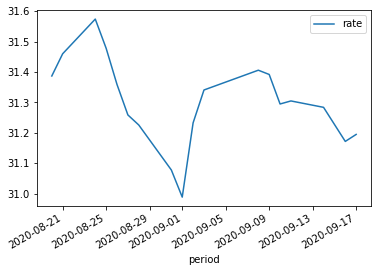

In [11]:
df.plot()